<a href="https://colab.research.google.com/github/ThamilezaiAnanthakumar/Cuffless-Blood-Pressure-Monitoring-using-PAT/blob/main/Cufless_Blood_Pressure_Monitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mkachuee/BloodPressureDataset")

print("Path to dataset files:", path)

100%|██████████| 4.60G/4.60G [00:52<00:00, 94.4MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/mkachuee/BloodPressureDataset/versions/5


In [4]:
import os
path= '/root/.cache/kagglehub/datasets/mkachuee/BloodPressureDataset/versions/5/Samples'
# List the contents of the downloaded directory
print(os.listdir(path))

['rec_87.csv', 'rec_44.csv', 'rec_486.csv', 'rec_301.csv', 'rec_168.csv', 'rec_359.csv', 'rec_471.csv', 'rec_16.csv', 'rec_353.csv', 'rec_29.csv', 'rec_365.csv', 'rec_201.csv', 'rec_55.csv', 'rec_269.csv', 'rec_371.csv', 'rec_136.csv', 'rec_180.csv', 'rec_247.csv', 'rec_436.csv', 'rec_92.csv', 'rec_148.csv', 'rec_445.csv', 'rec_278.csv', 'rec_261.csv', 'rec_9.csv', 'rec_127.csv', 'rec_320.csv', 'rec_139.csv', 'rec_451.csv', 'rec_306.csv', 'rec_114.csv', 'rec_195.csv', 'rec_484.csv', 'rec_258.csv', 'rec_364.csv', 'rec_197.csv', 'rec_363.csv', 'rec_265.csv', 'rec_99.csv', 'rec_259.csv', 'rec_160.csv', 'rec_355.csv', 'rec_207.csv', 'rec_223.csv', 'rec_443.csv', 'rec_151.csv', 'rec_333.csv', 'rec_145.csv', 'rec_350.csv', 'rec_153.csv', 'rec_391.csv', 'rec_370.csv', 'rec_373.csv', 'rec_317.csv', 'rec_239.csv', 'rec_205.csv', 'rec_339.csv', 'rec_83.csv', 'rec_227.csv', 'rec_161.csv', 'rec_497.csv', 'rec_376.csv', 'rec_347.csv', 'rec_230.csv', 'rec_416.csv', 'rec_171.csv', 'rec_392.csv', 'rec

In [5]:
!pip install neurokit2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 708.4/708.4 kB 23.9 MB/s eta 0:00:00


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import neurokit2 as nk
import numpy as np
from scipy.signal import find_peaks

In [7]:
sampling_rate = 125

def find_ppg_onsets(ppg_cleaned, peaks, sampling_rate=125, window_sec=0.5):
    onsets = []
    window = int(window_sec * sampling_rate)
    for peak in peaks:
        start = max(0, peak - window)
        segment = ppg_cleaned[start:peak]
        diff = np.gradient(segment)
        foot_index = np.argmin(diff)
        onset_index = start + foot_index
        onsets.append(onset_index)
    return onsets

In [8]:
csv_file_path = os.path.join(path, 'rec_96.csv')
# Read the CSV without a header
df = pd.read_csv(csv_file_path, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,71990,71991,71992,71993,71994,71995,71996,71997,71998,71999
0,1.41150,1.56790,1.74100,1.92180,2.09970,2.26880,2.42230,2.55720,2.65690,2.73220,...,0.96872,0.98045,1.00680,1.05470,1.12810,1.22970,1.35870,1.51120,1.67840,1.85240
1,115.91000,111.76000,108.87000,107.26000,106.43000,106.24000,106.43000,106.97000,107.60000,108.09000,...,154.10000,148.19000,141.35000,133.93000,126.51000,119.91000,115.08000,112.10000,110.83000,110.49000
2,0.47507,0.47019,0.47019,0.46481,0.47019,0.47019,0.47019,0.47507,0.47507,0.47507,...,0.49022,0.49022,0.49022,0.48485,0.48485,0.48485,0.48485,0.49022,0.49022,0.47996


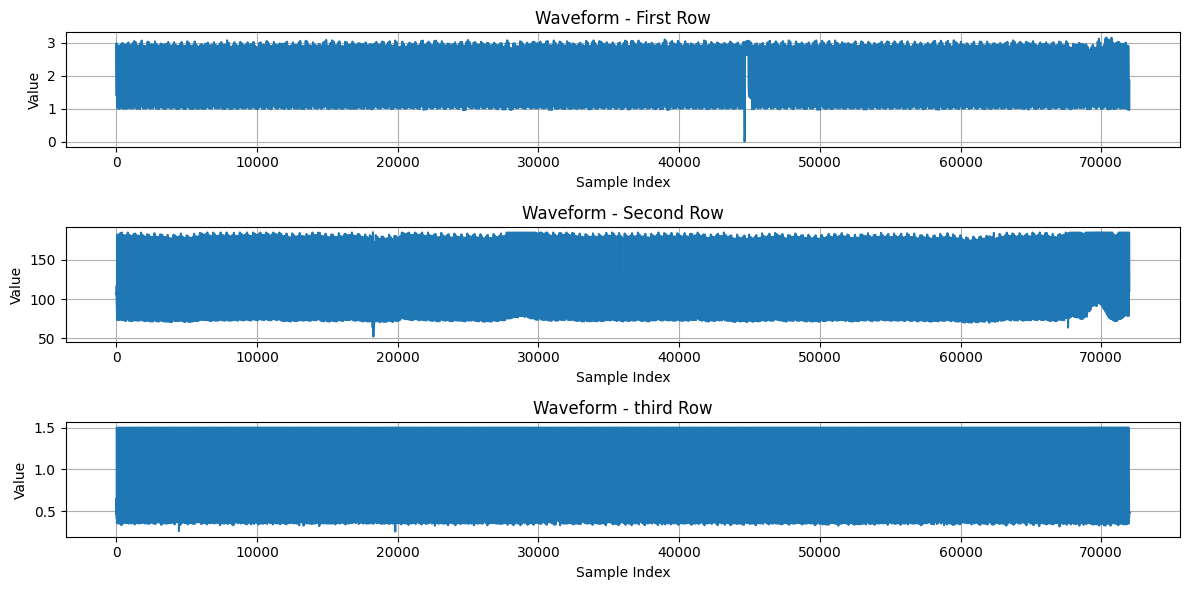

In [9]:
# prompt: plot and first and second row as wave form

import matplotlib.pyplot as plt

# Extract the first and second row as arrays
waveform_row1 = df.iloc[0].values
waveform_row2 = df.iloc[1].values
waveform_row3 = df.iloc[2].values

ppg = waveform_row1
abp = waveform_row2
ecg = waveform_row3

# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 6))

# Plot the first row
axes[0].plot(waveform_row1)
axes[0].set_title('Waveform - First Row')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Value')
axes[0].grid(True)

# Plot the second row
axes[1].plot(waveform_row2)
axes[1].set_title('Waveform - Second Row')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Value')
axes[1].grid(True)


# Plot the third row
axes[2].plot(waveform_row3)
axes[2].set_title('Waveform - third Row')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Value')
axes[2].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


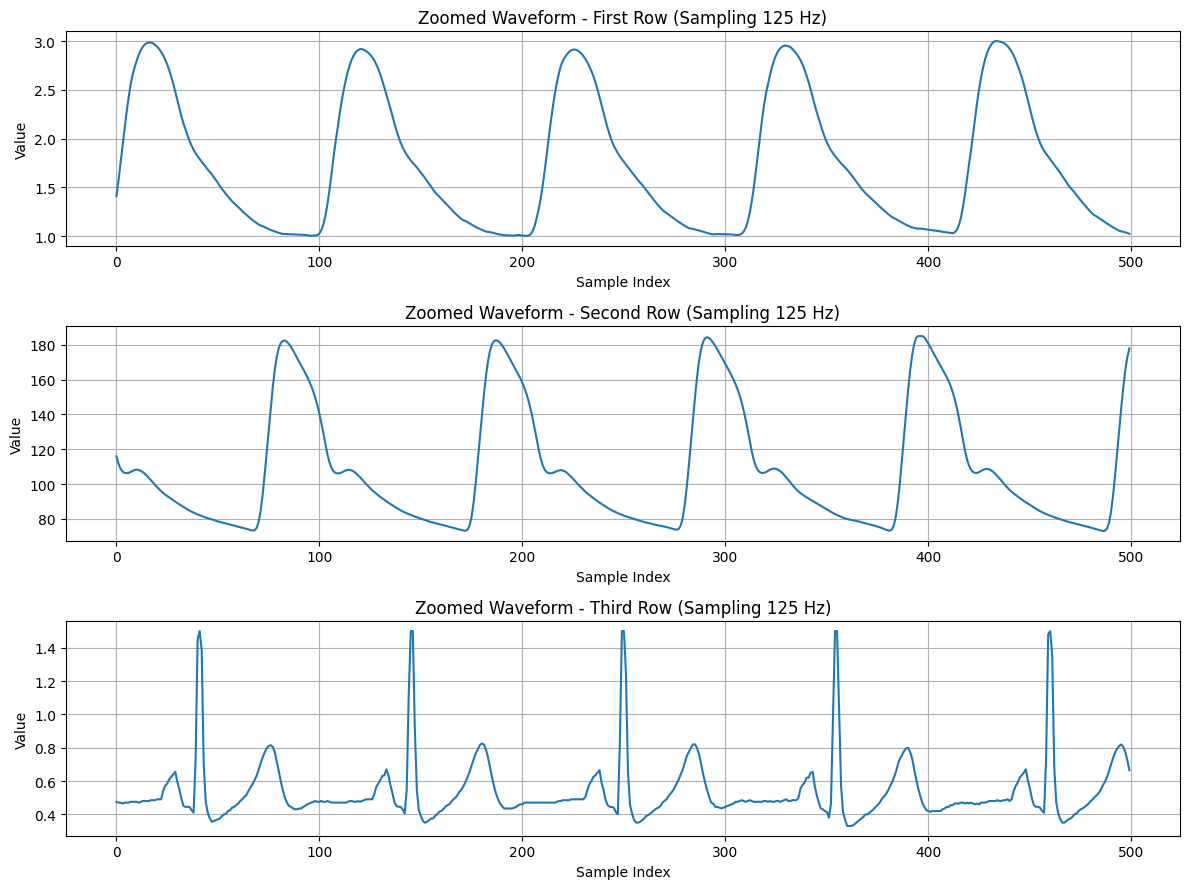

In [10]:
# Create a figure and a set of subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 9))

# Plot the first row with zooming
zoom_start = 0  # Start index for zooming
zoom_end = 500  # End index for zooming

axes[0].plot(waveform_row1[zoom_start:zoom_end])
axes[0].set_title('Zoomed Waveform - First Row (Sampling 125 Hz)')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Value')
axes[0].grid(True)

# Plot the second row with zooming
axes[1].plot(waveform_row2[zoom_start:zoom_end])
axes[1].set_title('Zoomed Waveform - Second Row (Sampling 125 Hz)')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Value')
axes[1].grid(True)

# Plot the third row with zooming
axes[2].plot(waveform_row3[zoom_start:zoom_end])
axes[2].set_title('Zoomed Waveform - Third Row (Sampling 125 Hz)')
axes[2].set_xlabel('Sample Index')
axes[2].set_ylabel('Value')
axes[2].grid(True)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [11]:
import neurokit2 as nk
import numpy as np
from scipy.signal import find_peaks


sampling_rate = 125

signals, info = nk.ecg_process(ecg, sampling_rate=125)
r_peaks = info["ECG_R_Peaks"]


_, ppg_info = nk.ppg_process(ppg, sampling_rate=125)
ppg_peaks = ppg_info["PPG_Peaks"]


systolic_peaks, _ = find_peaks(abp, distance=50)  # systolic (local maxima)
diastolic_peaks, _ = find_peaks(-abp, distance=50)  # diastolic (local minima)

systolic_values = abp[systolic_peaks]
diastolic_values = abp[diastolic_peaks]



In [12]:
print(systolic_values)
print(diastolic_values)

[108.29  182.43  182.63  184.39  185.02  181.94  181.26  181.5   185.02
 182.24  180.82  180.58  183.17  183.75  181.31  181.02  180.72  184.87
 181.9   180.43  179.7   182.68  182.48  180.14  179.31  179.45  184.14
 180.38  179.5   179.06  182.63  182.38  180.19  179.16  178.92  182.04
 178.18  177.35  177.94  182.19  181.16  179.75  179.5   179.99  183.75
 180.04  178.38  177.69  181.5   180.14  178.38  178.04  179.45  183.36
 180.04  179.89  180.14  184.58  183.85  182.43  182.38  182.82  185.02
 181.7   180.87  180.67  184.92  182.73  180.87  180.92  181.55  185.02
 181.8   181.46  180.58  185.02  182.38  180.38  180.14  181.94  184.73
 181.02  180.92  180.38  185.02  183.26  181.5   181.46  182.92  185.02
 181.75  180.72  180.63  185.02  183.8   182.38  181.6   183.26  185.02
 182.24  181.9   181.99  185.02  183.7   182.19  180.92  182.68  185.02
 183.36  182.73  182.19  185.02  183.7   181.36  180.23  180.82  183.75
 180.04  178.87  179.11  183.85  181.6   180.04  179.94  180.63 

In [13]:
def find_ppg_onsets(ppg_cleaned, peaks, sampling_rate=125, window_sec=0.5):
    onsets = []
    window = int(window_sec * sampling_rate)
    for peak in peaks:
        start = max(0, peak - window)
        segment = ppg_cleaned[start:peak]
        diff = np.gradient(segment)
        foot_index = np.argmin(diff)
        onset_index = start + foot_index
        onsets.append(onset_index)
    return onsets


In [14]:
onsets = find_ppg_onsets(ppg, r_peaks)

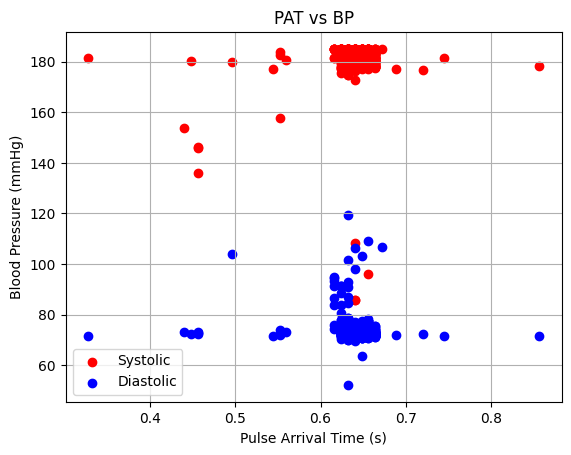

In [15]:
# Match each R-peak to the  next PPG foot (to compute PAT)
PATs = []
PAT_times = []
for r in r_peaks:
    future_foots = ppg_peaks[ppg_peaks > r]
    if len(future_foots) == 0:
        continue
    ppg_foot = future_foots[0]
    pat = (ppg_foot - r) / sampling_rate  # in seconds
    PATs.append(pat)
    PAT_times.append(r / sampling_rate)

# Ensure lengths match
min_len = min(len(PATs), len(systolic_values), len(diastolic_values))

# Create lists of individual values for plotting
pat_values = PATs[:min_len]
systolic_plotting_values = systolic_values[:min_len]
diastolic_plotting_values = diastolic_values[:min_len]

# Create a DataFrame for plotting
plotting_df = pd.DataFrame({
    "PAT (s)": pat_values,
    "Systolic BP": systolic_plotting_values,
    "Diastolic BP": diastolic_plotting_values
})


plt.scatter(plotting_df["PAT (s)"], plotting_df["Systolic BP"], label="Systolic", color='r')
plt.scatter(plotting_df["PAT (s)"], plotting_df["Diastolic BP"], label="Diastolic", color='b')
plt.xlabel("Pulse Arrival Time (s)")
plt.ylabel("Blood Pressure (mmHg)")
plt.title("PAT vs BP")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
pip install modin[ray]  # for Ray backend (fastest for most use cases)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.1/70.1 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.1 MB/s eta 0:00:00


In [17]:
from concurrent.futures import ProcessPoolExecutor
import pandas as pd

def process_file(file_name):
    csv_file_path = os.path.join(path, file_name)
    df = pd.read_csv(csv_file_path, header=None)

    waveform_row1 = df.iloc[0].values
    waveform_row2 = df.iloc[1].values
    waveform_row3 = df.iloc[2].values

    ppg = waveform_row1
    abp = waveform_row2
    ecg = waveform_row3

    try:
        signals, info = nk.ecg_process(ecg, sampling_rate=sampling_rate)
        r_peaks = info["ECG_R_Peaks"]

        _, ppg_info = nk.ppg_process(ppg, sampling_rate=sampling_rate)
        ppg_peaks = ppg_info["PPG_Peaks"]

        systolic_peaks, _ = find_peaks(abp, distance=50)
        diastolic_peaks, _ = find_peaks(-abp, distance=50)

        systolic_values = abp[systolic_peaks]
        diastolic_values = abp[diastolic_peaks]

        PATs = []
        for r in r_peaks:
            future_foots = ppg_peaks[ppg_peaks > r]
            if len(future_foots) == 0:
                continue
            ppg_foot = future_foots[0]
            pat = (ppg_foot - r) / sampling_rate
            PATs.append(pat)

        min_len = min(len(PATs), len(systolic_values), len(diastolic_values))
        if min_len == 0:
            return None  # Skip bad data

        return {
            "PAT (s)": (PATs[:min_len]),
            "Systolic BP": np.mean(systolic_values[:min_len]),
            "Diastolic BP": np.mean(diastolic_values[:min_len])
        }

    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        return None

# Get list of all CSVs
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

# Parallel processing
full_data = []
with ProcessPoolExecutor() as executor:
    results = executor.map(process_file, csv_files)

    full_data = [r for r in results if r is not None]

# Convert to DataFrame
df = pd.DataFrame(full_data)
print(df.head())


                                             PAT (s)  Systolic BP  \
0  [0.712, 0.704, 0.704, 0.712, 0.696, 0.712, 0.7...   144.729100   
1  [0.648, 0.008, 0.64, 0.64, 0.648, 0.008, 0.648...   109.433043   
2  [0.648, 0.664, 0.648, 0.656, 0.64, 0.632, 0.61...   173.209862   
3  [0.72, 0.72, 0.728, 0.72, 0.72, 0.728, 0.72, 0...   135.038979   
4  [0.032, 0.024, 0.032, 0.08, 0.032, 0.024, 0.03...   134.996052   

   Diastolic BP  
0     72.720148  
1     52.947696  
2     73.697431  
3     61.380101  
4     64.722653  


In [18]:
print(df.iloc[:, 0])


0      [0.712, 0.704, 0.704, 0.712, 0.696, 0.712, 0.7...
1      [0.648, 0.008, 0.64, 0.64, 0.648, 0.008, 0.648...
2      [0.648, 0.664, 0.648, 0.656, 0.64, 0.632, 0.61...
3      [0.72, 0.72, 0.728, 0.72, 0.72, 0.728, 0.72, 0...
4      [0.032, 0.024, 0.032, 0.08, 0.032, 0.024, 0.03...
                             ...                        
495    [0.064, 0.056, 0.064, 0.072, 0.064, 0.064, 0.0...
496    [0.688, 0.688, 0.688, 0.704, 0.696, 0.688, 0.6...
497    [0.16, 0.136, 0.144, 0.136, 0.112, 0.104, 0.10...
498    [0.728, 0.752, 0.752, 0.752, 0.744, 0.744, 0.7...
499    [0.472, 0.648, 0.648, 0.648, 0.648, 0.648, 0.6...
Name: PAT (s), Length: 500, dtype: object


In [26]:
print(len(df.iloc[1, 0]))

432


In [22]:
df.to_csv("processed_data.csv", index=False)

In [19]:
df.shape

(500, 3)

In [20]:
df.isna().sum()

,0
PAT (s),0
Systolic BP,0
Diastolic BP,0


In [23]:
import pandas as pd
import ast

# Load your CSV (update the path if needed)
df = pd.read_csv("/content/processed_data.csv")

# Step 1: Convert the stringified NumPy arrays to plain float lists
def parse_array_string(array_str):
    try:
        array_str = array_str.replace("np.float64", "")
        return list(map(float, ast.literal_eval(array_str)))
    except:
        return []

df['parsed_PAT'] = df['PAT (s)'].apply(parse_array_string)

# Step 2: Expand each element in array into a separate column
max_len = df['parsed_PAT'].apply(len).max()
pat_cols = pd.DataFrame(df['parsed_PAT'].to_list(), columns=[f'PAT_{i+1}' for i in range(max_len)])

# Step 3: Combine the expanded columns with other features
df_final = pd.concat([pat_cols, df[['Systolic BP', 'Diastolic BP']]], axis=1)

# Step 4: Save or display
df_final.to_csv("expanded_dataset.csv", index=False)
df_final.head()


,PAT_1,PAT_2,PAT_3,PAT_4,PAT_5,PAT_6,PAT_7,PAT_8,PAT_9,PAT_10,...,PAT_1106,PAT_1107,PAT_1108,PAT_1109,PAT_1110,PAT_1111,PAT_1112,PAT_1113,Systolic BP,Diastolic BP
0,0.712,0.704,0.704,0.712,0.696,0.712,0.704,0.704,0.696,0.704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,144.729100,72.720148
1,0.648,0.008,0.640,0.640,0.648,0.008,0.648,0.008,0.008,0.640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.433043,52.947696
2,0.648,0.664,0.648,0.656,0.640,0.632,0.616,0.640,0.672,0.848,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,173.209862,73.697431
3,0.720,0.720,0.728,0.720,0.720,0.728,0.720,0.720,0.728,0.728,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135.038979,61.380101
4,0.032,0.024,0.032,0.080,0.032,0.024,0.032,0.008,0.696,0.184,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,134.996052,64.722653


In [24]:
# prompt: print how many colums with nan

print(df_final.isnull().sum())

PAT_1             0
PAT_2             0
PAT_3             0
PAT_4             0
PAT_5             0
               ... 
PAT_1111        499
PAT_1112        499
PAT_1113        499
Systolic BP       0
Diastolic BP      0
Length: 1115, dtype: int64


In [27]:
# prompt: print   how many colums contain nan data

print((df_final.isnull().sum() > 0).sum())

1106


In [31]:
# prompt: print colum of PAT400

print(df_final['PAT_11'])

0      0.688
1      0.648
2      0.760
3      0.728
4      0.152
       ...  
495    0.064
496    0.696
497    0.104
498    0.744
499    0.648
Name: PAT_11, Length: 500, dtype: float64


In [30]:
# prompt: how many colums without nan only conatin numerical values

import numpy as np
# Calculate the number of columns that contain only numerical values and have no NaNs
numerical_columns_no_nan = df_final.select_dtypes(include=np.number).dropna(axis=1).shape[1]

print(f"Number of columns with only numerical values and no NaNs: {numerical_columns_no_nan}")


Number of columns with only numerical values and no NaNs: 9


In [33]:
# prompt: what names of colum which not contain nan

non_nan_columns = df_final.columns[df_final.notna().all()].tolist()

print("Columns with no NaN values:", non_nan_columns)

Columns with no NaN values: ['PAT_1', 'PAT_2', 'PAT_3', 'PAT_4', 'PAT_5', 'PAT_6', 'PAT_7', 'Systolic BP', 'Diastolic BP']


In [34]:
# prompt: drops colums contain nan values

df_final = df_final.dropna(axis=1)
print(df_final.head())
print(df_final.isnull().sum())

   PAT_1  PAT_2  PAT_3  PAT_4  PAT_5  PAT_6  PAT_7  Systolic BP  Diastolic BP
0  0.712  0.704  0.704  0.712  0.696  0.712  0.704   144.729100     72.720148
1  0.648  0.008  0.640  0.640  0.648  0.008  0.648   109.433043     52.947696
2  0.648  0.664  0.648  0.656  0.640  0.632  0.616   173.209862     73.697431
3  0.720  0.720  0.728  0.720  0.720  0.728  0.720   135.038979     61.380101
4  0.032  0.024  0.032  0.080  0.032  0.024  0.032   134.996052     64.722653
PAT_1           0
PAT_2           0
PAT_3           0
PAT_4           0
PAT_5           0
PAT_6           0
PAT_7           0
Systolic BP     0
Diastolic BP    0
dtype: int64


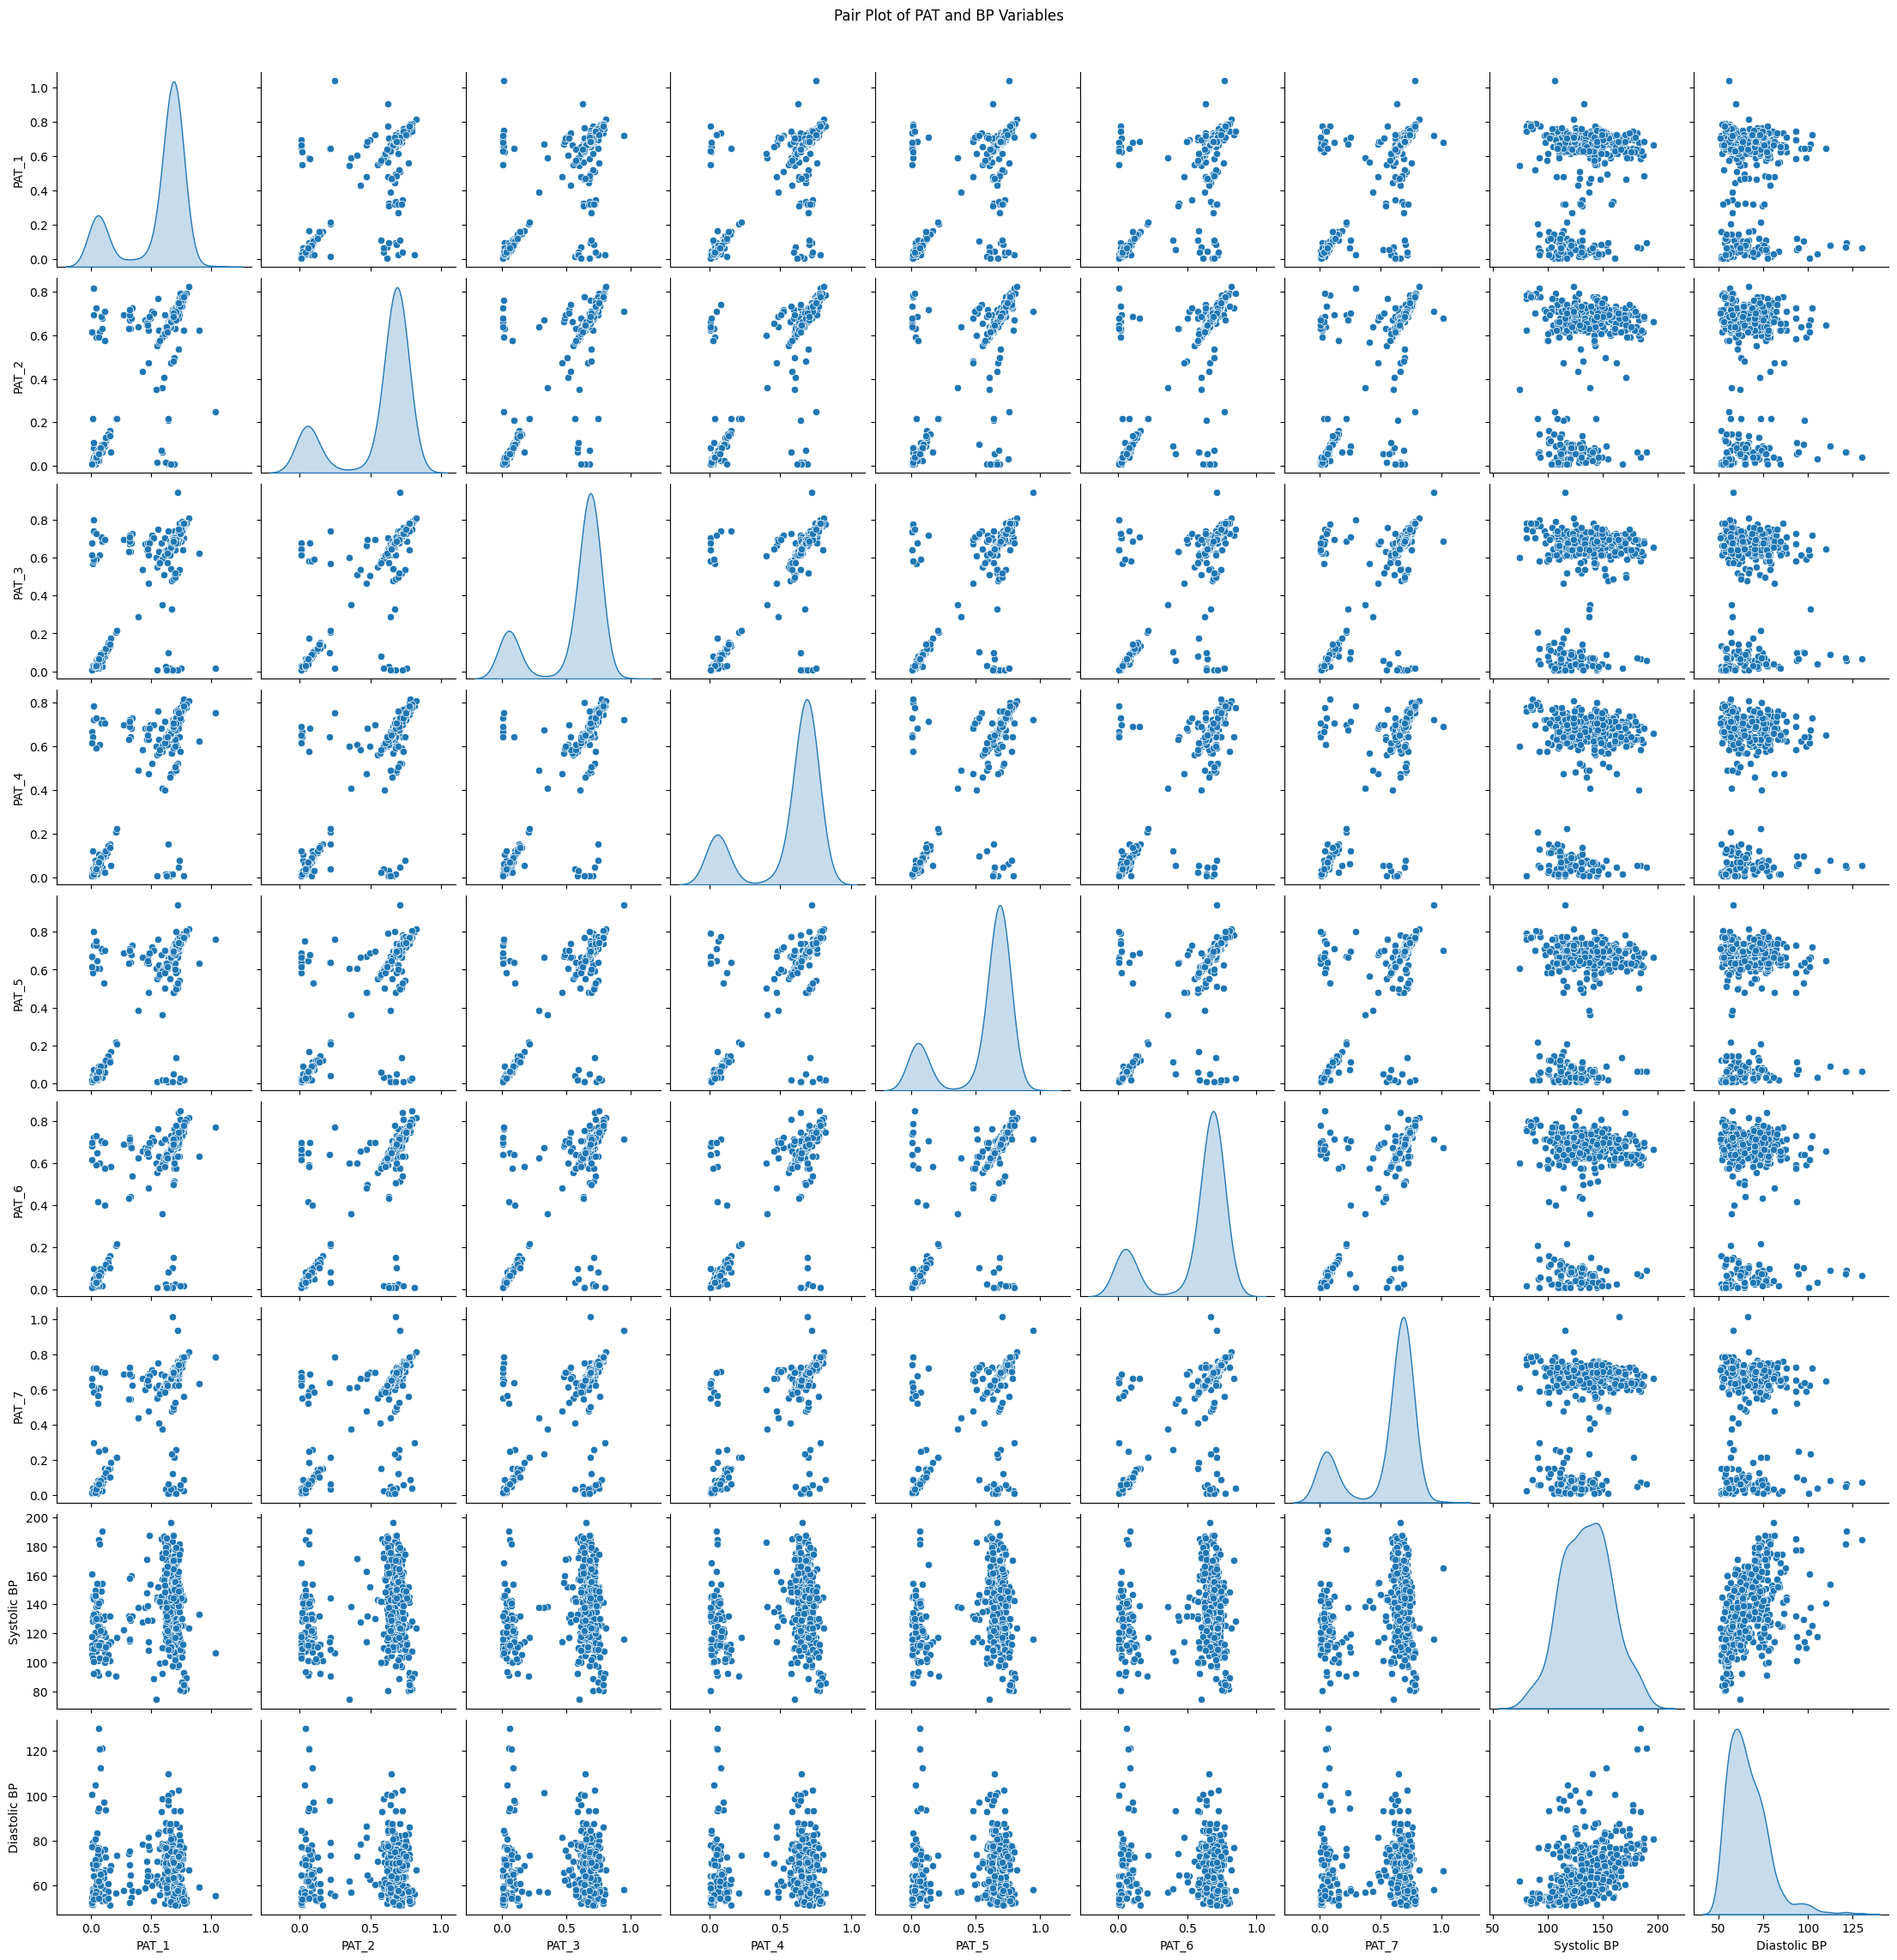

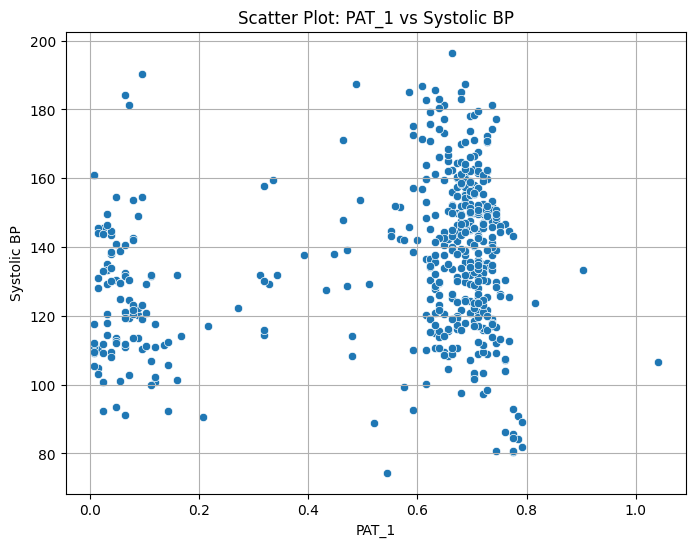

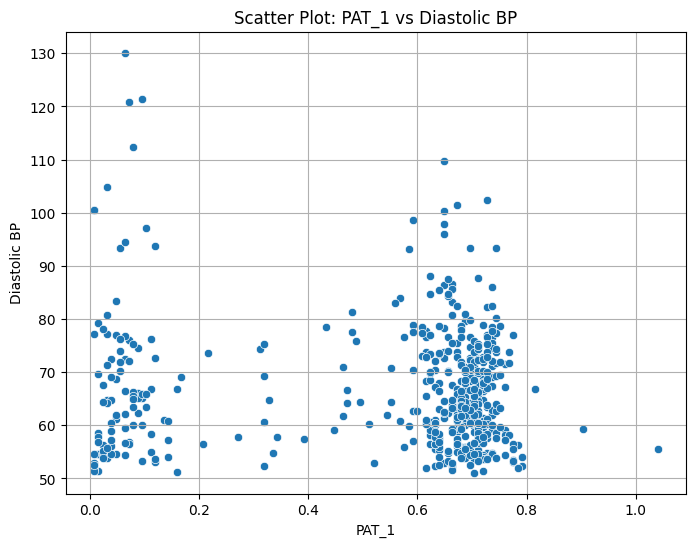

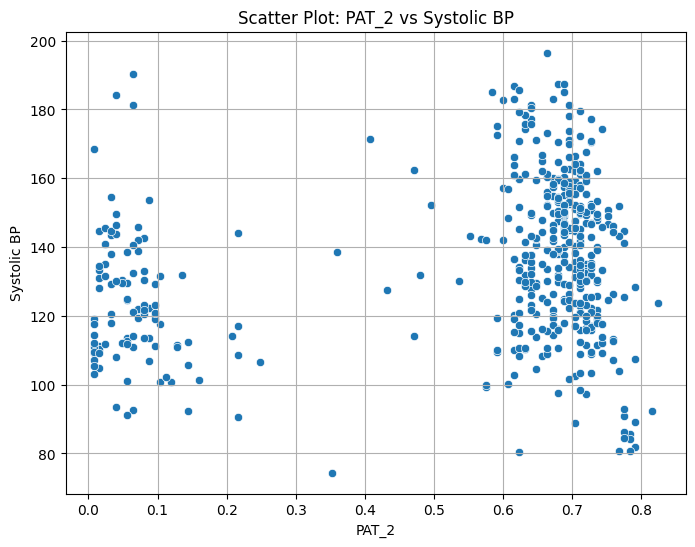

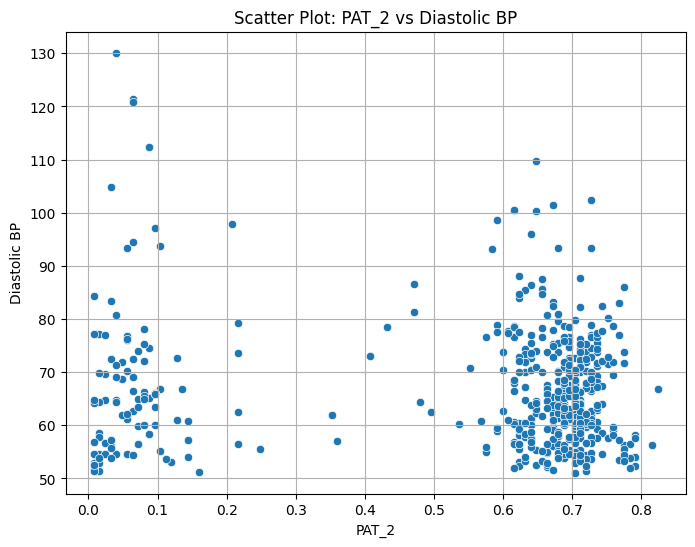

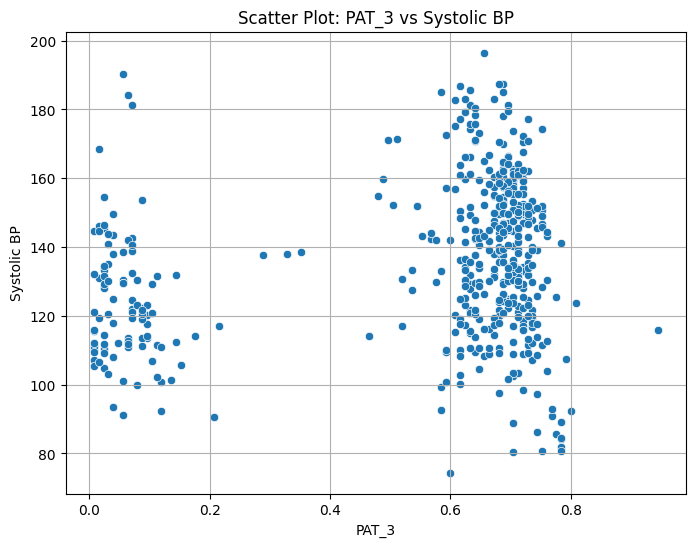

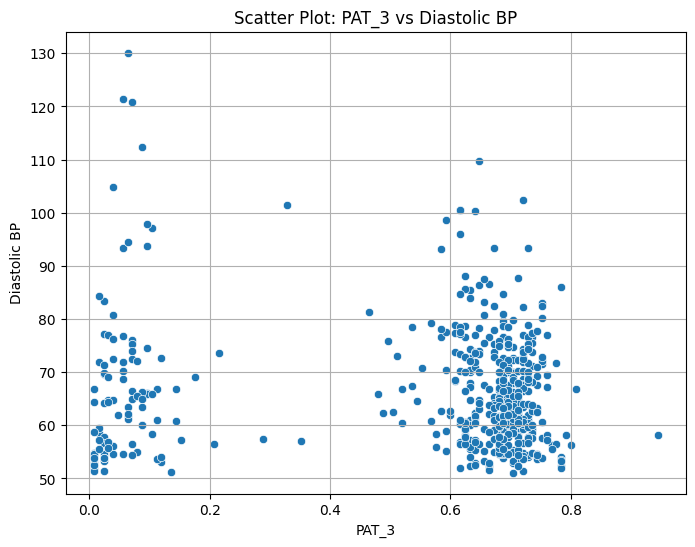

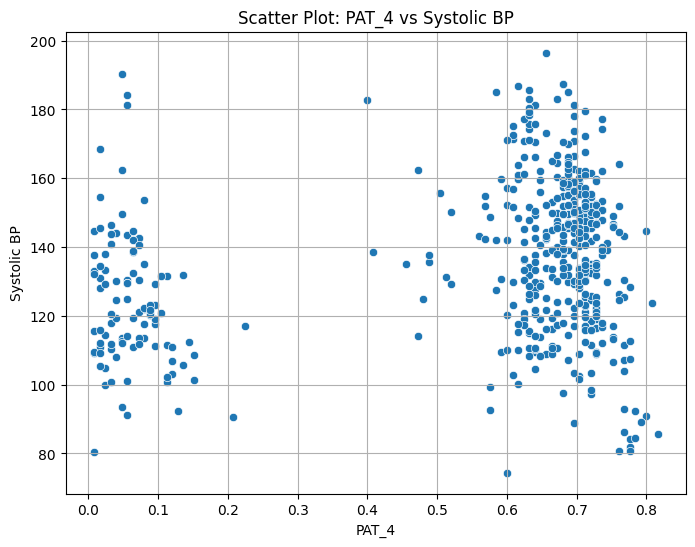

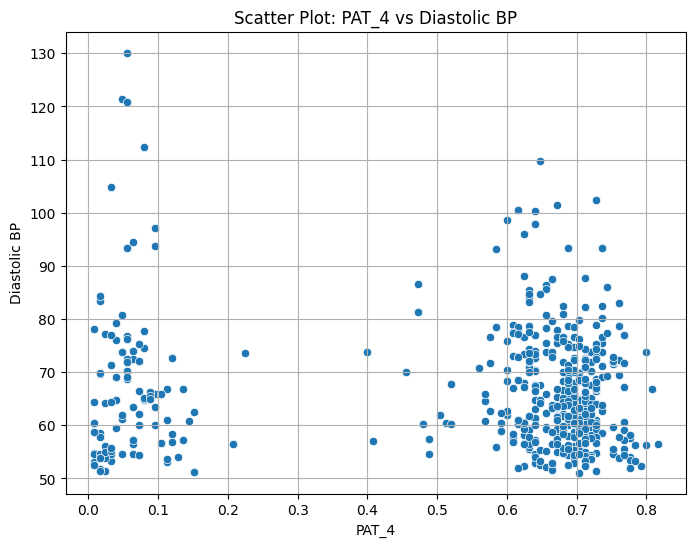

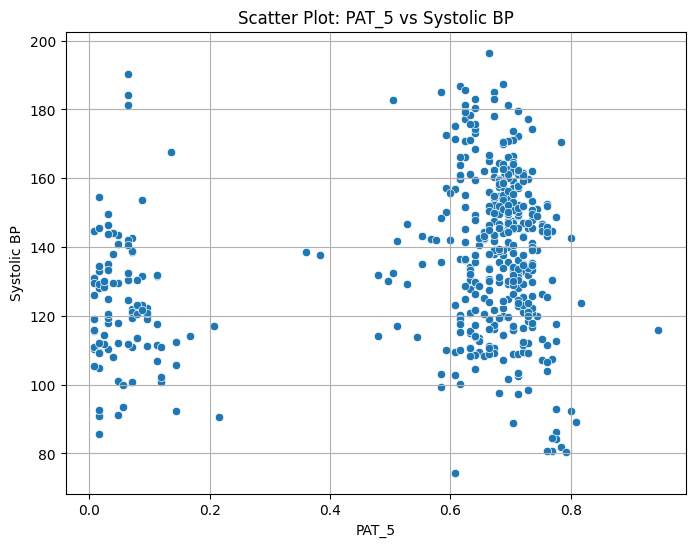

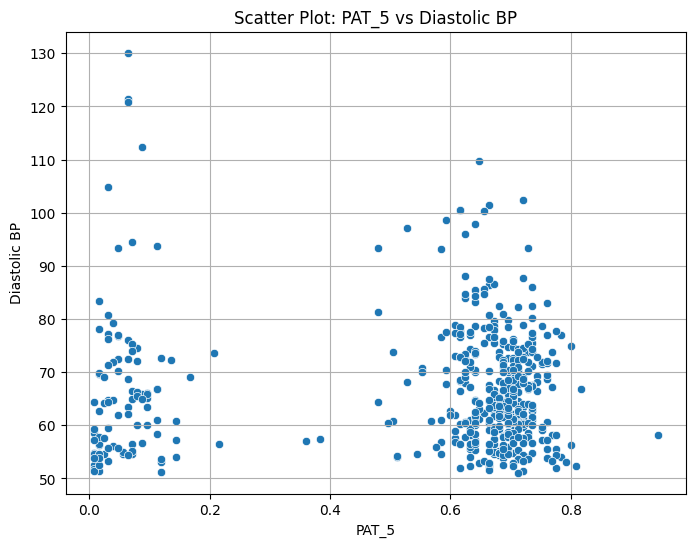

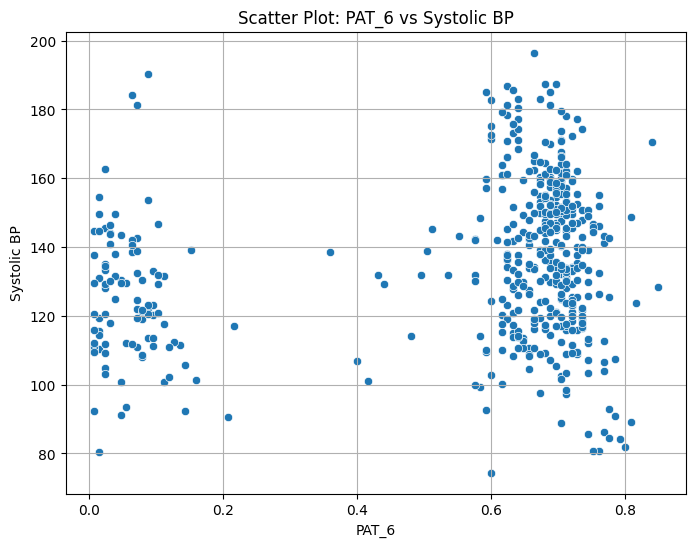

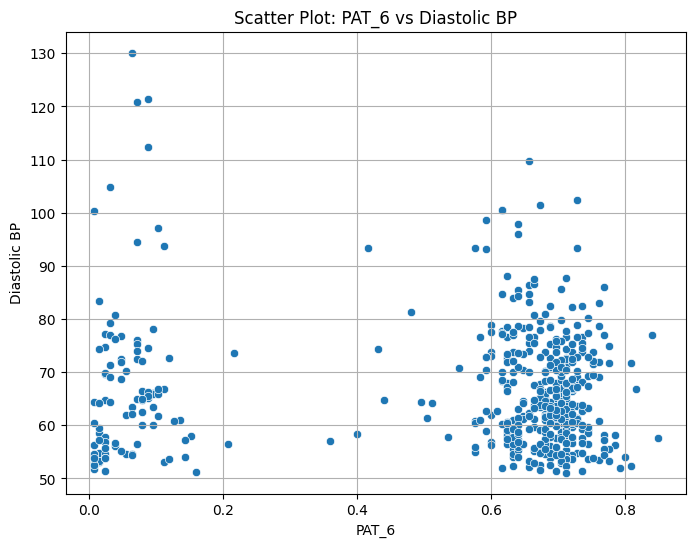

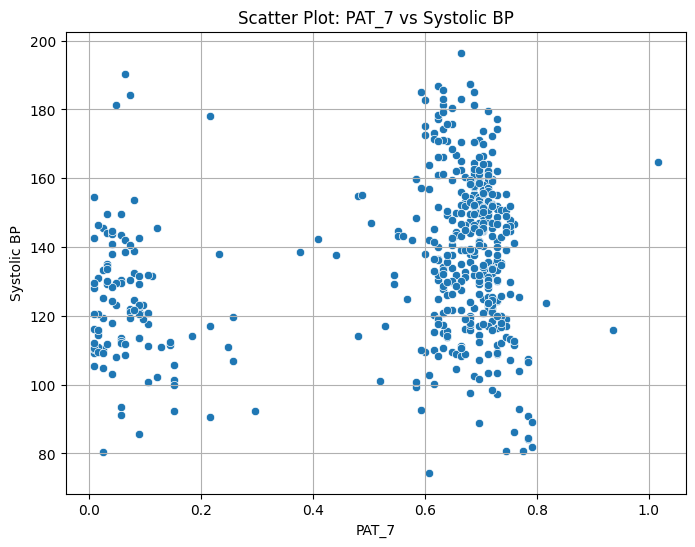

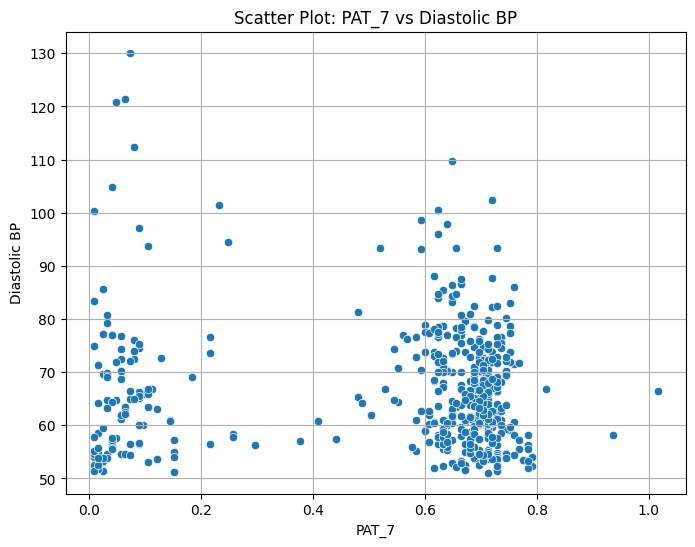

In [36]:
# prompt: plot scatter or srabon graph for visulzation of 7 colums with sy dis labels

import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns to plot (example: first 7 columns and the two BP columns)
# Adjust the column names based on the actual non-NaN columns in your df_final
columns_to_plot = df_final.columns[:7].tolist() + ['Systolic BP', 'Diastolic BP']
# Ensure these columns exist in the dataframe after dropping NaNs
columns_to_plot = [col for col in columns_to_plot if col in df_final.columns]


# Create a pair plot
sns.pairplot(df_final[columns_to_plot], diag_kind="kde") # Use kde for diagonal to show distribution
plt.suptitle("Pair Plot of PAT and BP Variables", y=1.02) # Add a title
plt.show()

# Alternatively, if you specifically want scatter plots of PAT columns vs BP
# You can loop through the PAT columns and create scatter plots
pat_columns = [col for col in df_final.columns if col.startswith('PAT_')]
bp_columns = ['Systolic BP', 'Diastolic BP']

for pat_col in pat_columns:
    for bp_col in bp_columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_final, x=pat_col, y=bp_col)
        plt.title(f'Scatter Plot: {pat_col} vs {bp_col}')
        plt.xlabel(pat_col)
        plt.ylabel(bp_col)
        plt.grid(True)
        plt.show()



In [35]:
# prompt: calculae statictis paramets like std mean median an other paramerts to trian model for dta augmentation

import numpy as np
# Calculate statistics for numerical columns
numerical_cols = df_final.select_dtypes(include=np.number)

# Calculate mean
mean_values = numerical_cols.mean()
print("\nMean of numerical columns:")
print(mean_values)

# Calculate standard deviation
std_values = numerical_cols.std()
print("\nStandard deviation of numerical columns:")
print(std_values)

# Calculate median
median_values = numerical_cols.median()
print("\nMedian of numerical columns:")
print(median_values)

# Calculate mode
mode_values = numerical_cols.mode().iloc[0] # mode can return multiple values, take the first
print("\nMode of numerical columns:")
print(mode_values)

# Calculate variance
variance_values = numerical_cols.var()
print("\nVariance of numerical columns:")
print(variance_values)

# Calculate min
min_values = numerical_cols.min()
print("\nMinimum of numerical columns:")
print(min_values)

# Calculate max
max_values = numerical_cols.max()
print("\nMaximum of numerical columns:")
print(max_values)

# Get descriptive statistics (includes count, mean, std, min, max, 25%, 50%, 75%)
descriptive_stats = numerical_cols.describe()
print("\nDescriptive statistics of numerical columns:")
descriptive_stats


Mean of numerical columns:
PAT_1             0.549648
PAT_2             0.559776
PAT_3             0.558112
PAT_4             0.555568
PAT_5             0.560496
PAT_6             0.559456
PAT_7             0.550144
Systolic BP     135.671132
Diastolic BP     66.461246
dtype: float64

Standard deviation of numerical columns:
PAT_1            0.257180
PAT_2            0.253222
PAT_3            0.253048
PAT_4            0.253391
PAT_5            0.252148
PAT_6            0.253104
PAT_7            0.257918
Systolic BP     22.680588
Diastolic BP    11.491304
dtype: float64

Median of numerical columns:
PAT_1             0.672000
PAT_2             0.680000
PAT_3             0.680000
PAT_4             0.672000
PAT_5             0.672000
PAT_6             0.672000
PAT_7             0.672000
Systolic BP     135.017515
Diastolic BP     64.249988
dtype: float64

Mode of numerical columns:
PAT_1             0.712000
PAT_2             0.712000
PAT_3             0.704000
PAT_4             0.712000

,PAT_1,PAT_2,PAT_3,PAT_4,PAT_5,PAT_6,PAT_7,Systolic BP,Diastolic BP
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.549648,0.559776,0.558112,0.555568,0.560496,0.559456,0.550144,135.671132,66.461246
std,0.257180,0.253222,0.253048,0.253391,0.252148,0.253104,0.257918,22.680588,11.491304
min,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,0.008000,74.409100,51.071509
25%,0.550000,0.608000,0.592000,0.598000,0.606000,0.600000,0.584000,119.100773,58.084637
50%,0.672000,0.680000,0.680000,0.672000,0.672000,0.672000,0.672000,135.017515,64.249988
75%,0.712000,0.712000,0.712000,0.712000,0.712000,0.712000,0.712000,151.178486,72.357280
max,1.040000,0.824000,0.944000,0.816000,0.944000,0.848000,1.016000,196.490968,130.113077


In [46]:
!pip install tsfel


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming your dataframe is already loaded as df_final
# For example:
# df_final = pd.read_csv('your_data.csv')

# Features columns
feature_cols = ['PAT_1', 'PAT_2', 'PAT_3', 'PAT_4', 'PAT_5', 'PAT_6', 'PAT_7']

X = df_final[feature_cols]

# Target columns (exact case-sensitive names)
y_systolic = df_final['Systolic BP']
y_diastolic = df_final['Diastolic BP']

# Split data into train and test (80% train, 20% test)
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)

# Initialize and train Random Forest regressors
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train, y_train_s)

model_d = RandomForestRegressor(n_estimators=100, random_state=42)
model_d.fit(X_train, y_train_d)

# Function to calculate accuracy within tolerance
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    correct = abs(y_true - y_pred) <= tol
    accuracy = correct.sum() / len(y_true) * 100
    return accuracy

# Predict on test set
pred_s_test = model_s.predict(X_test)
pred_d_test = model_d.predict(X_test)

# Predict on train set
pred_s_train = model_s.predict(X_train)
pred_d_train = model_d.predict(X_train)

# Calculate accuracy (% predictions within ±5 mmHg)
acc_s_test = accuracy_within_tolerance(y_test_s, pred_s_test, tol=5)
acc_d_test = accuracy_within_tolerance(y_test_d, pred_d_test, tol=5)

acc_s_train = accuracy_within_tolerance(y_train_s, pred_s_train, tol=5)
acc_d_train = accuracy_within_tolerance(y_train_d, pred_d_train, tol=5)

print(f"Systolic BP Accuracy ±5 mmHg: Train = {acc_s_train:.2f}%, Test = {acc_s_test:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {acc_d_train:.2f}%, Test = {acc_d_test:.2f}%")


Systolic BP Accuracy ±5 mmHg: Train = 47.00%, Test = 18.00%
Diastolic BP Accuracy ±5 mmHg: Train = 78.00%, Test = 30.00%


In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming your dataframe is loaded as df_final
# Example: df_final = pd.read_csv('your_data.csv')

feature_cols = ['PAT_1', 'PAT_2', 'PAT_3', 'PAT_4', 'PAT_5', 'PAT_6', 'PAT_7']

# Feature engineering: add mean and std of PAT columns
df_final['PAT_mean'] = df_final[feature_cols].mean(axis=1)
df_final['PAT_std'] = df_final[feature_cols].std(axis=1)

# New feature set with engineered features
X = df_final[feature_cols + ['PAT_mean', 'PAT_std']]

# Targets
y_systolic = df_final['Systolic BP']
y_diastolic = df_final['Diastolic BP']

# Split into train and test
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressors
model_s = RandomForestRegressor(n_estimators=100, random_state=42)
model_s.fit(X_train_scaled, y_train_s)

model_d = RandomForestRegressor(n_estimators=100, random_state=42)
model_d.fit(X_train_scaled, y_train_d)

# Accuracy within tolerance function
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    correct = abs(y_true - y_pred) <= tol
    accuracy = correct.sum() / len(y_true) * 100
    return accuracy

# Predictions
pred_s_train = model_s.predict(X_train_scaled)
pred_s_test = model_s.predict(X_test_scaled)

pred_d_train = model_d.predict(X_train_scaled)
pred_d_test = model_d.predict(X_test_scaled)

# Calculate accuracies within ±5 mmHg tolerance
acc_s_train = accuracy_within_tolerance(y_train_s, pred_s_train, tol=5)
acc_s_test = accuracy_within_tolerance(y_test_s, pred_s_test, tol=5)

acc_d_train = accuracy_within_tolerance(y_train_d, pred_d_train, tol=5)
acc_d_test = accuracy_within_tolerance(y_test_d, pred_d_test, tol=5)

print(f"Systolic BP Accuracy ±5 mmHg: Train = {acc_s_train:.2f}%, Test = {acc_s_test:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {acc_d_train:.2f}%, Test = {acc_d_test:.2f}%")



Systolic BP Accuracy ±5 mmHg: Train = 47.50%, Test = 14.00%
Diastolic BP Accuracy ±5 mmHg: Train = 80.00%, Test = 25.00%


In [59]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models, callbacks

# Load your data into df_final before running

# Define PAT features
feature_cols = ['PAT_1', 'PAT_2', 'PAT_3', 'PAT_4', 'PAT_5', 'PAT_6', 'PAT_7']

# Add powerful statistical features
df_final['PAT_mean'] = df_final[feature_cols].mean(axis=1)
df_final['PAT_std'] = df_final[feature_cols].std(axis=1)
df_final['PAT_min'] = df_final[feature_cols].min(axis=1)
df_final['PAT_max'] = df_final[feature_cols].max(axis=1)
df_final['PAT_range'] = df_final['PAT_max'] - df_final['PAT_min']
df_final['PAT_median'] = df_final[feature_cols].median(axis=1)
df_final['PAT_skew'] = df_final[feature_cols].skew(axis=1)
df_final['PAT_kurtosis'] = df_final[feature_cols].kurtosis(axis=1)

# Feature matrix and targets
X = df_final[feature_cols + [
    'PAT_mean', 'PAT_std', 'PAT_min', 'PAT_max',
    'PAT_range', 'PAT_median', 'PAT_skew', 'PAT_kurtosis'
]]

y_systolic = df_final['Systolic BP']
y_diastolic = df_final['Diastolic BP']

# Train-test split
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)

# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Accuracy within tolerance function
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    return np.mean(np.abs(y_true - y_pred) <= tol) * 100

# Neural network model
def build_model(input_dim, l2_reg=0.001, dropout_rate=0.2):
    model = models.Sequential([
        layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), input_shape=(input_dim,)),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Systolic Model
model_s = build_model(X_train_scaled.shape[1])
early_stop_s = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_s.fit(X_train_scaled, y_train_s, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop_s])

pred_s_train = model_s.predict(X_train_scaled).flatten()
pred_s_test = model_s.predict(X_test_scaled).flatten()

train_acc_s = accuracy_within_tolerance(y_train_s, pred_s_train)
test_acc_s = accuracy_within_tolerance(y_test_s, pred_s_test)

# Diastolic Model
model_d = build_model(X_train_scaled.shape[1])
early_stop_d = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_d.fit(X_train_scaled, y_train_d, validation_split=0.2, epochs=100, batch_size=16, verbose=0, callbacks=[early_stop_d])

pred_d_train = model_d.predict(X_train_scaled).flatten()
pred_d_test = model_d.predict(X_test_scaled).flatten()

train_acc_d = accuracy_within_tolerance(y_train_d, pred_d_train)
test_acc_d = accuracy_within_tolerance(y_test_d, pred_d_test)

# Final results
print(f"Systolic BP Accuracy ±5 mmHg: Train = {train_acc_s:.2f}%, Test = {test_acc_s:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {train_acc_d:.2f}%, Test = {test_acc_d:.2f}%")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Systolic BP Accuracy ±5 mmHg: Train = 16.25%, Test = 16.00%
Diastolic BP Accuracy ±5 mmHg: Train = 37.00%, Test = 28.00%


In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis

# Assume df_final is your loaded dataframe

feature_cols = ['PAT_1', 'PAT_2', 'PAT_3', 'PAT_4', 'PAT_5', 'PAT_6', 'PAT_7']

# Feature engineering: mean, std, skew, kurtosis of PAT columns (per row)
df_final['PAT_mean'] = df_final[feature_cols].mean(axis=1)
df_final['PAT_std'] = df_final[feature_cols].std(axis=1)
#df_final['PAT_skew'] = df_final[feature_cols].apply(lambda x: skew(x), axis=1)

# New feature set including skew and kurtosis
X = df_final[feature_cols + ['PAT_mean', 'PAT_std']]  #, 'PAT_skew'

# Targets
y_systolic = df_final['Systolic BP']
y_diastolic = df_final['Diastolic BP']

# Split into train and test
X_train, X_test, y_train_s, y_test_s = train_test_split(X, y_systolic, test_size=0.2, random_state=42)
_, _, y_train_d, y_test_d = train_test_split(X, y_diastolic, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest Regressors with high regularization
model_s = RandomForestRegressor(
    n_estimators=200,          # more trees for stability
    max_depth=5,               # shallow trees to reduce overfitting
    min_samples_leaf=10,       # min samples per leaf
    random_state=42
)
model_s.fit(X_train_scaled, y_train_s)

model_d = RandomForestRegressor(
    n_estimators=200,
    max_depth=5,
    min_samples_leaf=10,
    random_state=42
)
model_d.fit(X_train_scaled, y_train_d)

# Accuracy within tolerance function
def accuracy_within_tolerance(y_true, y_pred, tol=5):
    correct = abs(y_true - y_pred) <= tol
    accuracy = correct.sum() / len(y_true) * 100
    return accuracy

# Predictions
pred_s_train = model_s.predict(X_train_scaled)
pred_s_test = model_s.predict(X_test_scaled)

pred_d_train = model_d.predict(X_train_scaled)
pred_d_test = model_d.predict(X_test_scaled)

# Calculate accuracies within ±5 mmHg tolerance
acc_s_train = accuracy_within_tolerance(y_train_s, pred_s_train, tol=5)
acc_s_test = accuracy_within_tolerance(y_test_s, pred_s_test, tol=5)

acc_d_train = accuracy_within_tolerance(y_train_d, pred_d_train, tol=5)
acc_d_test = accuracy_within_tolerance(y_test_d, pred_d_test, tol=5)

print(f"Systolic BP Accuracy ±5 mmHg: Train = {acc_s_train:.2f}%, Test = {acc_s_test:.2f}%")
print(f"Diastolic BP Accuracy ±5 mmHg: Train = {acc_d_train:.2f}%, Test = {acc_d_test:.2f}%")


Systolic BP Accuracy ±5 mmHg: Train = 21.75%, Test = 18.00%
Diastolic BP Accuracy ±5 mmHg: Train = 45.50%, Test = 27.00%


In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
import tensorflow as tf
from tensorflow.keras import layers, regularizers, models, callbacks

# Assume df_final loaded with PAT_1...PAT_7, Systolic BP, Diastolic BP

feature_cols = ['PAT_1', 'PAT_2', 'PAT_3', 'PAT_4', 'PAT_5', 'PAT_6', 'PAT_7']

def extract_stats_features(df, cols):
    stats_df = pd.DataFrame()
    stats_df['mean'] = df[cols].mean(axis=1)
    stats_df['std'] = df[cols].std(axis=1)
    stats_df['median'] = df[cols].median(axis=1)
    stats_df['skew'] = df[cols].apply(lambda x: skew(x), axis=1)
    stats_df['kurtosis'] = df[cols].apply(lambda x: kurtosis(x), axis=1)
    return stats_df

X_basic = df_final[feature_cols]
X_stats = extract_stats_features(df_final, feature_cols)
X = pd.concat([X_basic, X_stats], axis=1)

y_systolic = df_final['Systolic BP'].values
y_diastolic = df_final['Diastolic BP'].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def create_model(input_dim, l2_reg=0.01, dropout_rate=0.3):
    model = models.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(l2_reg), input_shape=(input_dim,)),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu', kernel_regularizer=regularizers.l2(l2_reg)),
        layers.Dropout(dropout_rate),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def accuracy_within_tolerance(y_true, y_pred, tol=5):
    correct = np.abs(y_true - y_pred) <= tol
    accuracy = np.sum(correct) / len(y_true) * 100
    return accuracy

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X_scaled), 1):
    X_train, X_val = X_scaled[train_index], X_scaled[val_index]
    y_train_s, y_val_s = y_systolic[train_index], y_systolic[val_index]
    y_train_d, y_val_d = y_diastolic[train_index], y_diastolic[val_index]

    model_s = create_model(X_train.shape[1])
    model_d = create_model(X_train.shape[1])

    early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train systolic model
    model_s.fit(X_train, y_train_s, validation_data=(X_val, y_val_s),
                epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])

    pred_s_train = model_s.predict(X_train).flatten()
    pred_s_val = model_s.predict(X_val).flatten()

    train_acc_s = accuracy_within_tolerance(y_train_s, pred_s_train, tol=5)
    val_acc_s = accuracy_within_tolerance(y_val_s, pred_s_val, tol=5)

    # Train diastolic model
    model_d.fit(X_train, y_train_d, validation_data=(X_val, y_val_d),
                epochs=100, batch_size=16, verbose=0, callbacks=[early_stop])

    pred_d_train = model_d.predict(X_train).flatten()
    pred_d_val = model_d.predict(X_val).flatten()

    train_acc_d = accuracy_within_tolerance(y_train_d, pred_d_train, tol=5)
    val_acc_d = accuracy_within_tolerance(y_val_d, pred_d_val, tol=5)

    print(f"Fold {fold}:")
    print(f"  Systolic BP - Train Accuracy ±5 mmHg: {train_acc_s:.2f}%, Val Accuracy ±5 mmHg: {val_acc_s:.2f}%")
    print(f"  Diastolic BP - Train Accuracy ±5 mmHg: {train_acc_d:.2f}%, Val Accuracy ±5 mmHg: {val_acc_d:.2f}%\n")


/tmp/ipython-input-52-1207403377.py:18: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats_df['skew'] = df[cols].apply(lambda x: skew(x), axis=1)
/tmp/ipython-input-52-1207403377.py:19: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  stats_df['kurtosis'] = df[cols].apply(lambda x: kurtosis(x), axis=1)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fold 1:
  Systolic BP - Train Accuracy ±5 mmHg: 0.00%, Val Accuracy ±5 mmHg: 0.00%
  Diastolic BP - Train Accuracy ±5 mmHg: 0.00%, Val Accuracy ±5 mmHg: 0.00%

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Fold 2:
  Systolic BP - Train Accuracy ±5 mmHg: 0.00%, Val Accuracy ±5 mmHg: 0.00%
  Diastolic BP - Train Accuracy ±5 mmHg: 0.00%, Val Accuracy ±5 mmHg: 0.00%

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Fold 3:
  Systolic BP - Train Accuracy ±5 mmHg: 0.00%, Val Accuracy ±5 mmHg: 0.00%
  Diastolic BP - Train Accuracy ±5 mmHg: 0.00%, Val Accuracy ±5 mmHg: 0.00%

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
4/4 ━━━━━━━━

In [45]:
# Check Python version
!python --version

Python 3.11.13
